# Analysis of fake data

In [1]:
# Making sure Julia is working properly
+(2, 2)

4

## In this lesson
* Import packages
* Import dataset (in csv format) using the *DataFrames* package
* Change the coded values
* Have a look around the imported dataset
* Descriptive statististics including simple plotting using the Gadfly package
* Inferential statistics using the *HypothesisTests* package including how to decide between the use of parametric vs nonparametric tests

## Importing packages

In [2]:
# Pkg.add("")

In [2]:
using DataFrames

In [3]:
using Gadfly

In [4]:
using StatsBase

In [5]:
using HypothesisTests

In [6]:
using Distributions

In [8]:
#using Plotly

In [9]:
#include("plotly_credentials.jl")

## Importing the data file

In [7]:
df = readtable("CCS.csv");

In [8]:
head(df)

,PatientID,Cat1,Cat2,Var1,Var2,Var3
1,1,A,C,38.25682170735211,5.939131803063266,35.05790787394423
2,2,A,C,17.831672926455425,5.3475437647467015,21.130960534087748
3,8,A,B,16.021847362622296,6.60708739107548,60.94357572800236
4,9,A,C,45.11578946046756,6.007331523437179,21.879716257527214
5,16,A,C,20.448024664719128,8.548191553013755,20.662273742223093
6,18,A,B,28.354866592358434,7.956423420109708,33.180721180524046


In [9]:
# Making sure there are no NA-values
# Looking at the data types
showcols(df)

120x6 DataFrame
| Col # | Name      | Eltype     | Missing |
|-------|-----------|------------|---------|
| 1     | PatientID | Int64      | 0       |
| 2     | Cat1      | UTF8String | 0       |
| 3     | Cat2      | UTF8String | 0       |
| 4     | Var1      | Float64    | 0       |
| 5     | Var2      | Float64    | 0       |
| 6     | Var3      | Float64    | 0       |

## Changing coded values

In [10]:
# Calculating the number of rows and columns in the DataFrame
nrows, ncols = size(df)

(120,6)

In [11]:
# Results of a specific row and column entry
df[3, 4]

16.021847362622296

In [12]:
# Column 4 is also :Var1
df[3, :Var1]

16.021847362622296

In [13]:
# Select some rows and all columns
df[3:5, :]

,PatientID,Cat1,Cat2,Var1,Var2,Var3
1,8,A,B,16.021847362622296,6.60708739107548,60.94357572800236
2,9,A,C,45.11578946046756,6.007331523437179,21.879716257527214
3,16,A,C,20.448024664719128,8.548191553013755,20.662273742223093


In [14]:
# Select some rows and some columns
df[3:5, [2, 4]]

,Cat1,Var1
1,A,16.021847362622296
2,A,45.11578946046756
3,A,20.448024664719128


In [15]:
# Select some rows and some columns
df[3:5, [:Cat1, :Var1]]

,Cat1,Var1
1,A,16.021847362622296
2,A,45.11578946046756
3,A,20.448024664719128


In [16]:
# More selection
df[[2, 5, 99], 2:4]

,Cat1,Cat2,Var1
1,A,C,17.831672926455425
2,A,C,20.448024664719128
3,B,F,22.58171946648838


In [17]:
# Changing the values of Cat1
# A was minor infections
# B was major infections
for r in 1:nrows # Loop through all the rows
    temp = df[r, :Cat1] # Create a variable called temp
    if isna(temp)
        # do nothing
        elseif temp == "A"
        df[r, :Cat1] = "Minor infection"
        elseif temp == "B"
        df[r, :Cat1] = "Major infection"
    else
        # do nothing
    end
end

In [18]:
# Changing the values of Cat2
for r in 1:nrows
    temp = df[r, :Cat2]
    if isna(temp)
        # do nothing
        elseif temp == "C" || temp == "X" || temp == "R" # Using OR
        df[r, :Cat2] = "Female"
        elseif temp == "L" || temp == "B" || temp == "F"
        df[r, :Cat2] = "Male"
    else
        # do nothing
    end
end

In [19]:
# Correcting the age
df[:Var1] = df[:Var1] - 5

120-element DataArray{Float64,1}:
 33.2568
 12.8317
 11.0218
 40.1158
 15.448 
 23.3549
 17.4497
 43.4125
 35.0075
 15.7181
 12.0396
 37.6687
 14.954 
  ⋮     
 12.0029
 50.3879
 15.2205
 11.4172
 42.6224
 68.0229
 11.4106
 11.2801
 11.8883
 27.3537
 15.1379
 12.6144

In [20]:
# Renaming the columns
rename!(df, :Cat1, :Infection)
rename!(df, :Cat2, :Gender)
rename!(df, :Var1, :Age)
rename!(df, :Var2, :HbA1c)
rename!(df, :Var3, :CRP)

,PatientID,Infection,Gender,Age,HbA1c,CRP
1,1,Minor infection,Female,33.25682170735211,5.939131803063266,35.05790787394423
2,2,Minor infection,Female,12.831672926455425,5.3475437647467015,21.130960534087748
3,8,Minor infection,Male,11.021847362622296,6.60708739107548,60.94357572800236
4,9,Minor infection,Female,40.11578946046756,6.007331523437179,21.879716257527214
5,16,Minor infection,Female,15.448024664719128,8.548191553013755,20.662273742223093
6,18,Minor infection,Male,23.354866592358434,7.956423420109708,33.180721180524046
7,25,Minor infection,Female,17.449698055243154,6.346176553966556,40.23647859806062
8,28,Minor infection,Male,43.41249747282861,5.325830066483782,28.89558282117991
9,29,Minor infection,Female,35.00749019795842,11.418946000149159,71.59107138476448
10,33,Minor infection,Female,15.718078088759942,5.3776825349838875,27.421634761166143


## Descriptive statistics

In [21]:
# Count of number per group of amputation
# Use the values for categorical data analysis
groups = by(df, :Infection, d -> DataFrame(N = size(d, 1)))

,Infection,N
1,Major infection,60
2,Minor infection,60


In [22]:
# Count of number per group of gender
gender = by(df, :Gender, d -> DataFrame(N = size(d, 1)))

,Gender,N
1,Female,60
2,Male,60


In [23]:
# Calculating the mean of a column
mean(df[:Age])

22.967863792237893

In [24]:
median(df[:Age])

17.68007894647561

In [25]:
std(df[:Age])

13.116990926253415

In [26]:
# Describe the values in a column
describe(df[:Age])

Summary Stats:
Mean:         22.967864
Minimum:      10.235601
1st Quartile: 12.967475
Median:       17.680079
3rd Quartile: 29.746373
Maximum:      79.237810


In [27]:
describe(df[:HbA1c])

Summary Stats:
Mean:         5.921205
Minimum:      3.011733
1st Quartile: 4.065523
Median:       5.642406
3rd Quartile: 6.839651
Maximum:      15.582649


In [28]:
describe(df[:CRP])

Summary Stats:
Mean:         51.950031
Minimum:      20.315296
1st Quartile: 32.235514
Median:       44.304176
3rd Quartile: 64.858850
Maximum:      147.397402


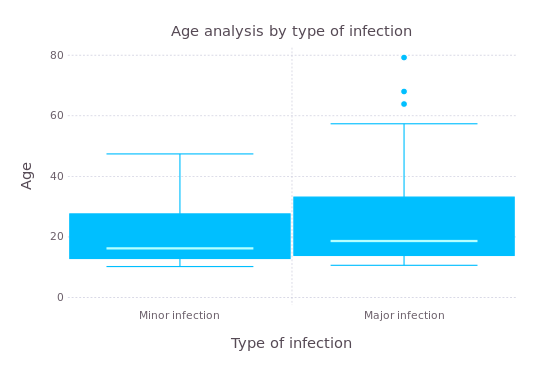

In [29]:
# Using the Gadfly package
plot(df, x = "Infection", y = "Age", Geom.boxplot, Guide.title("Age analysis by type of infection"),
Guide.xlabel("Type of infection"), Guide.ylabel("Age"))

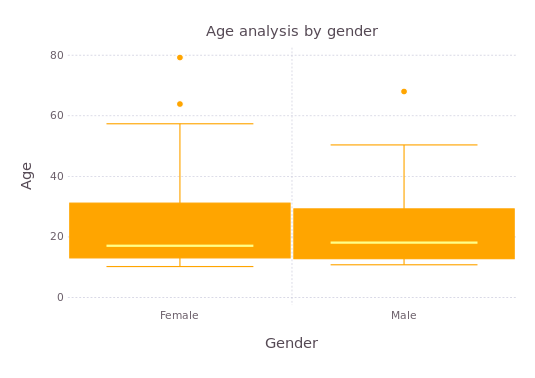

In [30]:
plot(df, x = "Gender", y = "Age", Geom.boxplot, Guide.title("Age analysis by gender"),
Guide.xlabel("Gender"), Guide.ylabel("Age"), Theme(default_color = colorant"orange"))

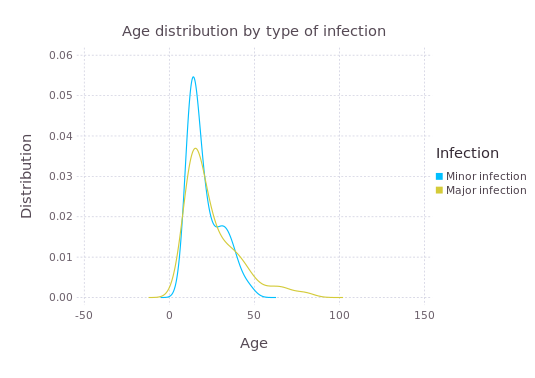

In [31]:
plot(df, x = "Age", color = "Infection", Geom.density, Guide.title("Age distribution by type of infection"), 
Guide.xlabel("Age"), Guide.ylabel("Distribution"))

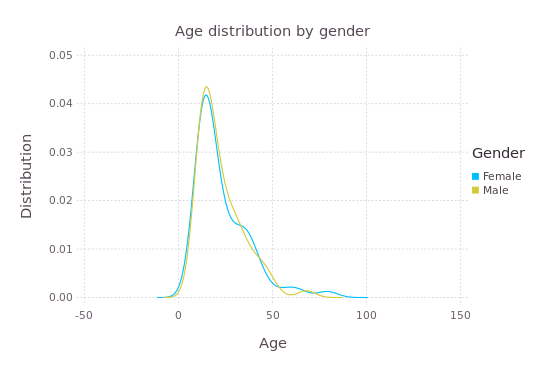

In [32]:
plot(df, x = "Age", color = "Gender", Geom.density, Guide.title("Age distribution by gender"), 
Guide.xlabel("Age"), Guide.ylabel("Distribution"))

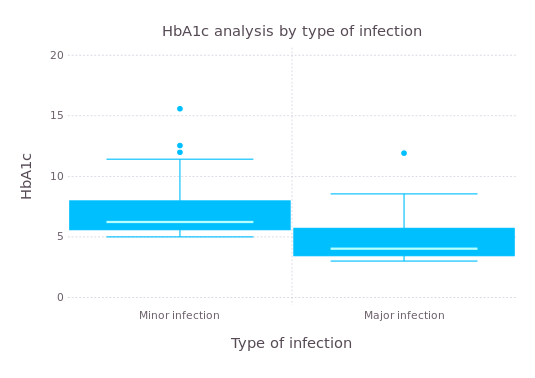

In [33]:
plot(df, x = "Infection", y = "HbA1c", Geom.boxplot, Guide.title("HbA1c analysis by type of infection"), 
Guide.xlabel("Type of infection"), Guide.ylabel("HbA1c"))

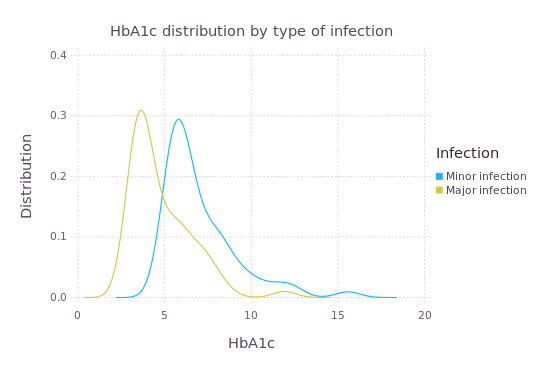

In [34]:
plot(df, x = "HbA1c", color = "Infection", Geom.density, Guide.title("HbA1c distribution by type of infection"), 
Guide.xlabel("HbA1c"), Guide.ylabel("Distribution"))

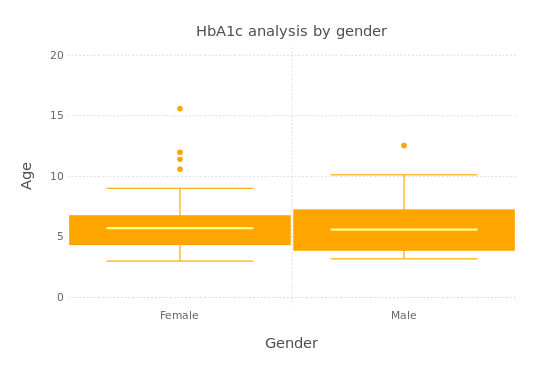

In [35]:
plot(df, x = "Gender", y = "HbA1c", Geom.boxplot, Guide.title("HbA1c analysis by gender"), 
Guide.xlabel("Gender"), Guide.ylabel("Age"), Theme(default_color = colorant"orange"))

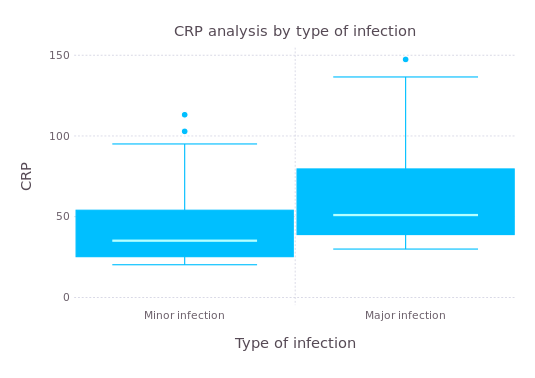

In [36]:
plot(df, x = "Infection", y = "CRP", Geom.boxplot, Guide.title("CRP analysis by type of infection"), 
Guide.xlabel("Type of infection"), Guide.ylabel("CRP"))

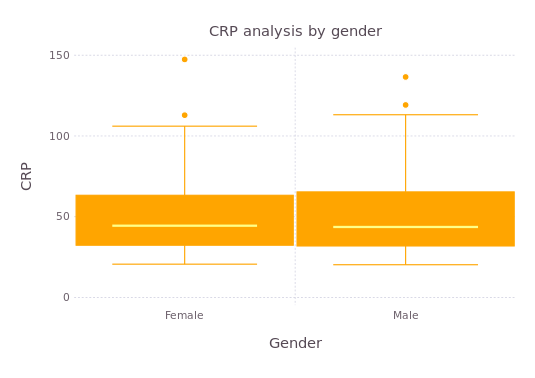

In [37]:
plot(df, x = "Gender", y = "CRP", Geom.boxplot, Guide.title("CRP analysis by gender"), 
Guide.xlabel("Gender"), Guide.ylabel("CRP"), Theme(default_color = colorant"orange"))

## Inferential statistics

In [38]:
# Creating individual DataFrames
minor = df[df[:Infection] .== "Minor infection", :]
major = df[df[:Infection] .== "Major infection", :]
female = df[df[:Gender] .== "Female", :]
male = df[df[:Gender] .== "Male", :];

In [39]:
# Count levels of amputatations by gender
by(minor, :Gender,d -> DataFrame(N = size(d, 1)))

,Gender,N
1,Female,29
2,Male,31


In [40]:
by(major, :Gender,d -> DataFrame(N = size(d, 1)))

,Gender,N
1,Female,31
2,Male,29


In [41]:
# Combining toe and foot amputations to get 2x2 contingency table
# Using FishersExactTest from the HypothesisTests package
#                     Female         Male
# Minor infection     29             31
# Major infections    31             29
FisherExactTest(29, 31, 31, 29)

Fisher's exact test
-------------------
Population details:
    parameter of interest:   Odds ratio
    value under h_0:         1.0
    point estimate:          0.8761040629077481
    95% confidence interval: (0.4021316586321565,1.9032998148973006)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8552344413446413 (not signficant)

Details:
    contingency table:
        29  31
        31  29


In [42]:
# Checking distributions using the Kolmogorov-Smirnov test from the HypothesisTests package
ExactOneSampleKSTest(df[:Age], Normal(mean(df[:Age]), std(df[:Age])))

Exact one sample Kolmorov-Smirnov test
--------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.1689987485297917

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.00182487802092679 (very significant)

Details:
    number of observations:   120


In [43]:
ExactOneSampleKSTest(df[:HbA1c], Normal(mean(df[:HbA1c]), std(df[:HbA1c])))

Exact one sample Kolmorov-Smirnov test
--------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.10542457878357658

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.12916532225692645 (not signficant)

Details:
    number of observations:   120


In [44]:
ExactOneSampleKSTest(df[:CRP], Normal(mean(df[:CRP]), std(df[:CRP])))

Exact one sample Kolmorov-Smirnov test
--------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.1285224834354674

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.03457928687894718 (significant)

Details:
    number of observations:   120


In [45]:
# Using nonparametric tests for two groups nonetheless
MannWhitneyUTest(minor[:Age], major[:Age])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -2.4292312272307086

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2878502713319637 (not signficant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             1597.0
    rank sums:                            [3427.0,3833.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (-203.0,190.5255888325765)


In [46]:
MannWhitneyUTest(minor[:HbA1c], major[:HbA1c])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          2.204107265879177

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           8.911043220275755e-10 (extremely significant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             2968.0
    rank sums:                            [4798.0,2462.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (1168.0,190.5255888325765)


In [47]:
# Checking descriptive statistics for HbA1c in the two groups
describe(minor[:HbA1c])

Summary Stats:
Mean:         7.057998
Minimum:      5.007773
1st Quartile: 5.601074
Median:       6.237020
3rd Quartile: 7.977990
Maximum:      15.582649


In [48]:
describe(major[:HbA1c])

Summary Stats:
Mean:         4.784413
Minimum:      3.011733
1st Quartile: 3.453761
Median:       4.032912
3rd Quartile: 5.712855
Maximum:      11.917937


In [49]:
MannWhitneyUTest(minor[:CRP], major[:CRP])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -15.866078281489749

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           9.525817333080766e-5 (extremely significant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             1056.0
    rank sums:                            [2886.0,4374.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (-744.0,190.5255888325765)


In [50]:
# Using MannWhitneyU test
MannWhitneyUTest(female[:Age], male[:Age])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -1.036465493753596

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9393353532121992 (not signficant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             1785.0
    rank sums:                            [3615.0,3645.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (-15.0,190.5255888325765)


In [51]:
MannWhitneyUTest(female[:HbA1c], male[:HbA1c])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.11678243974029012

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9018354821522864 (not signficant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             1824.0
    rank sums:                            [3654.0,3606.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (24.0,190.5255888325765)


In [52]:
MannWhitneyUTest(female[:CRP], male[:CRP])

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.7878830756252739

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7389164706392968 (not signficant)

Details:
    number of observations in each group: [60,60]
    Mann-Whitney-U statistic:             1736.0
    rank sums:                            [3566.0,3694.0]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (-64.0,190.5255888325765)
